2023-03-31 01:35:08.427436: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 01:35:08.510736: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-31 01:35:08.899006: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-31 01:35:08.899042: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

0.22328305


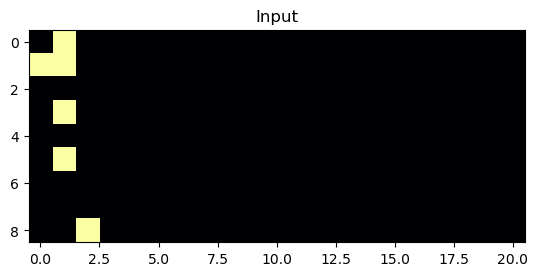

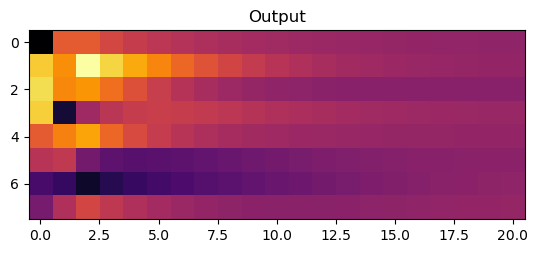

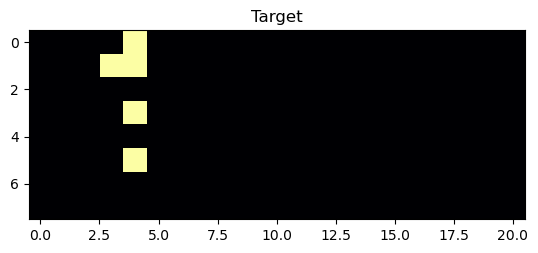

/home/mortimer/NeuralTuringMachine/model.py:245: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(X, cmap='inferno')


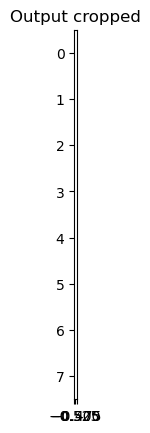

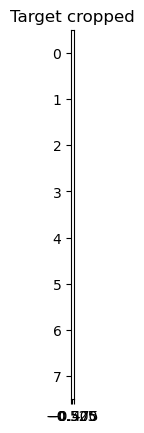

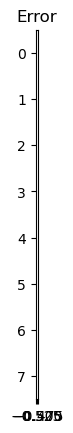

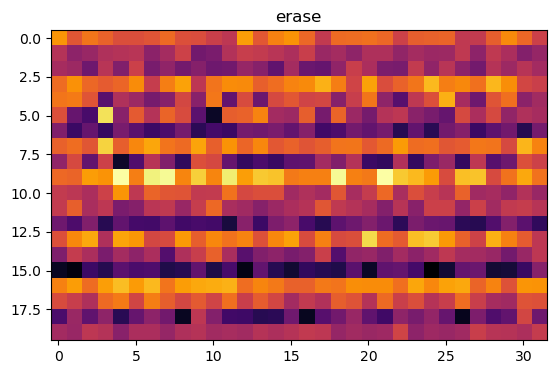

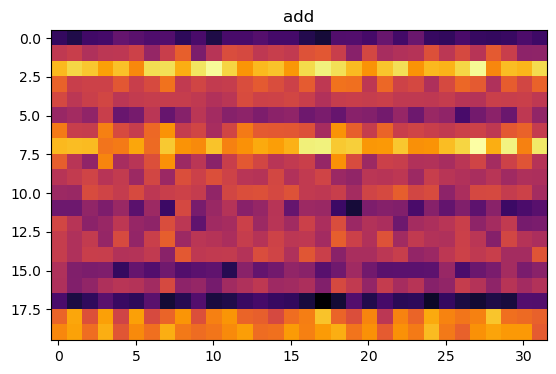

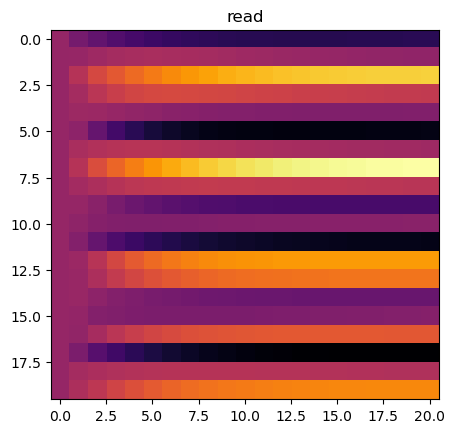

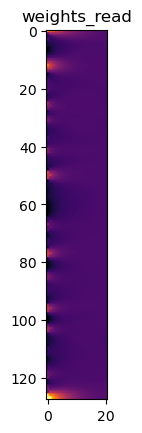

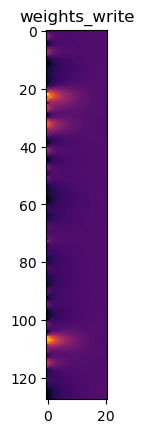

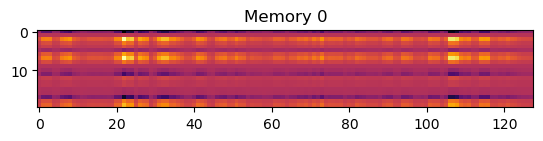

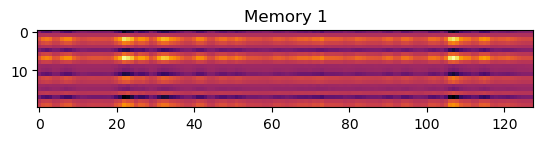

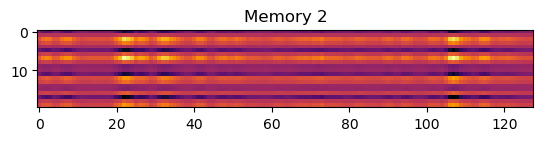

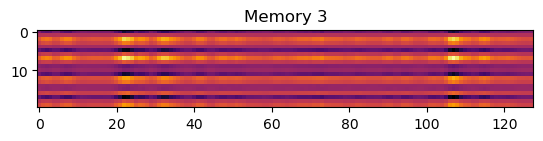

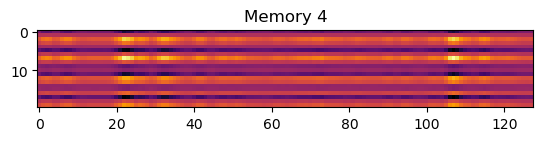

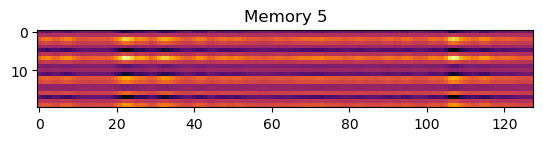

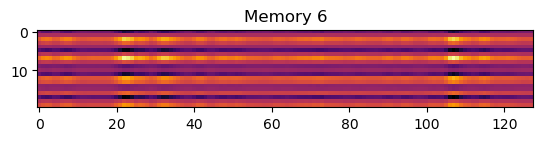

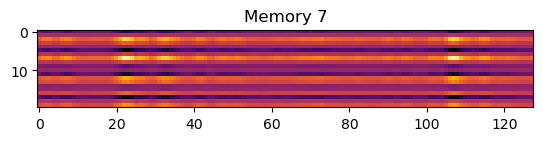

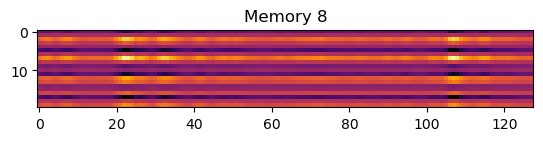

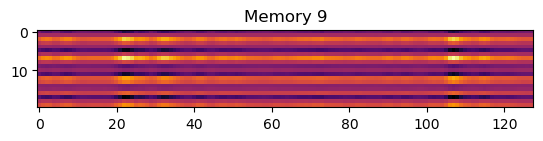

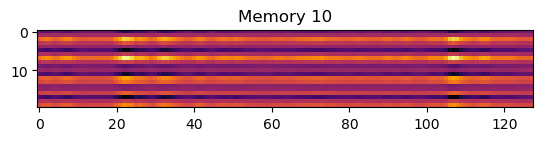

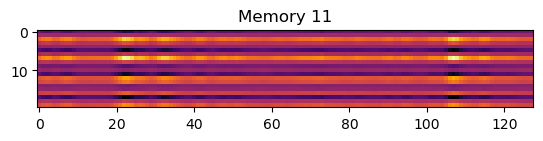

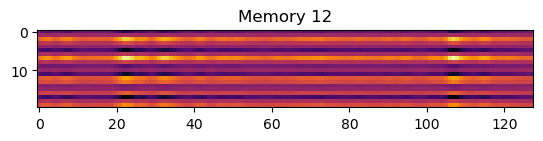

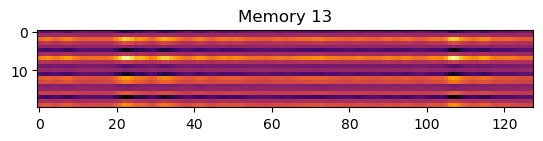

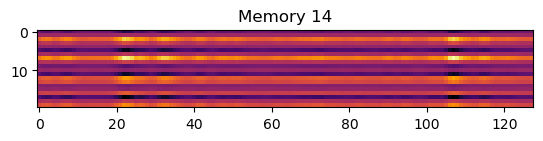

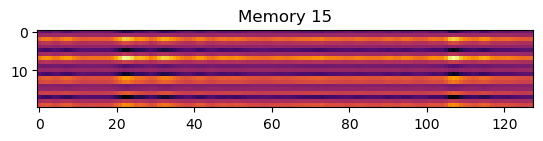

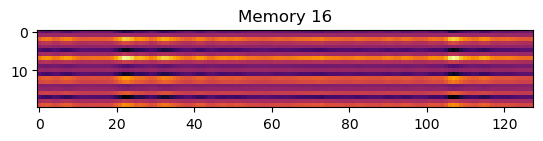

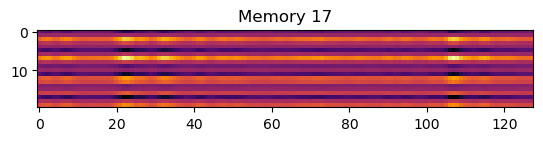

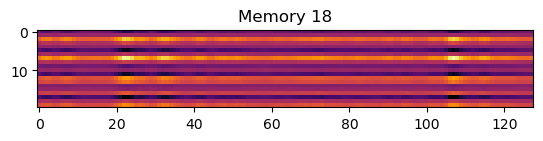

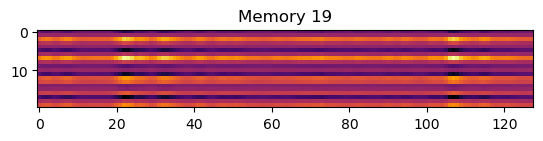

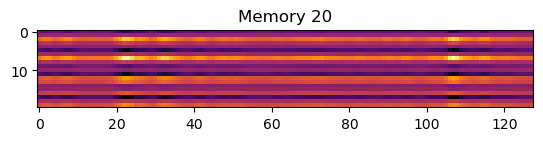

In [1]:
from datasets import *
from model import *
from matplotlib import pyplot as plt
%matplotlib inline



#dataset = copy_dataset
#dataset = copy_scaled_dataset
#dataset = copy_token_dataset
#dataset = copy_token_scaled_dataset
#dataset = copy_random_dataset
#dataset = copy_random_scaled_dataset
#dataset = copy_random_token_dataset
#dataset = copy_random_token_scaled_dataset
#dataset = copy_random_nomask_dataset
#dataset = copy_random_nomask_scaled_dataset
#dataset = copy_random_nomask_token_dataset
dataset = copy_random_nomask_token_scaled_dataset


model = NeuralTuringMachine()
X, Y, mask = next(iter(dataset))
model(X)
print(model.test(dataset, 10))
model.visualize(dataset)

TRAINING: 100%|███████████████████████████████████████████████| 100000/100000 [1:50:06<00:00, 15.14it/s]


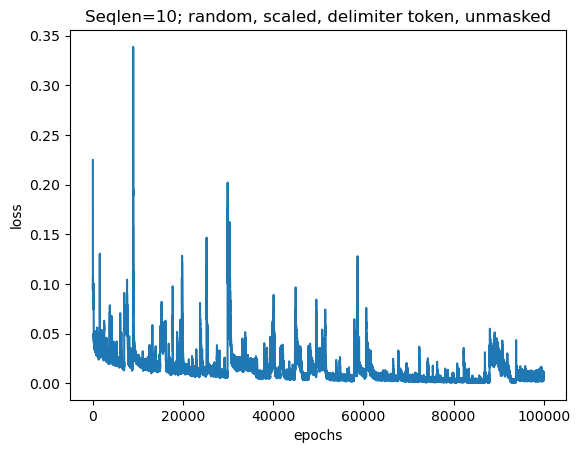

In [2]:
history = model.train(dataset, 100_000)
plt.plot(range(len(history)), history)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Seqlen=10; random, scaled, delimiter token, unmasked')
plt.show()

Testing: 100%|██████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.65it/s]

0.0070591196
Model: "neural_turing_machine"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 neural_turing_machine_cell   multiple                 62536     
 (NeuralTuringMachineCell)                                       
                                                                 
 rnn (RNN)                   multiple                  62536     
                                                                 
Total params: 62,538
Trainable params: 62,536
Non-trainable params: 2
_________________________________________________________________


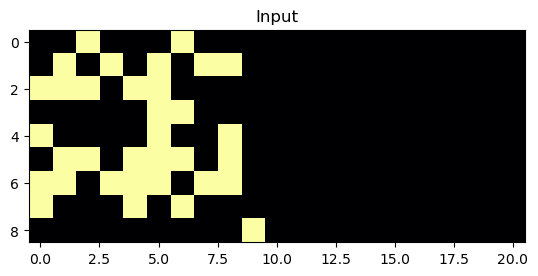

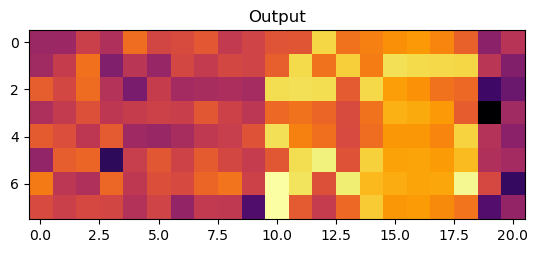

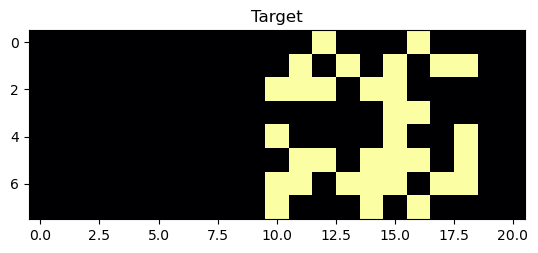

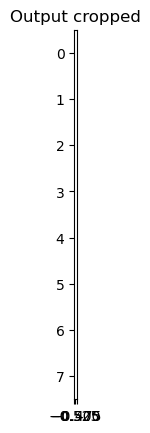

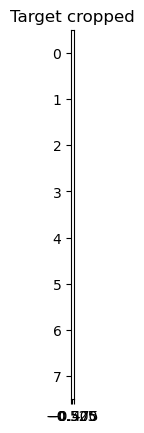

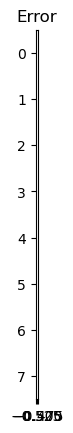

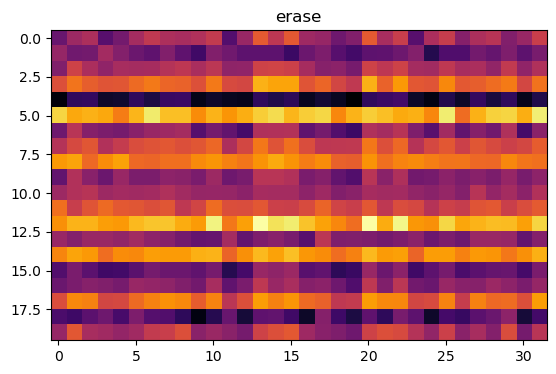

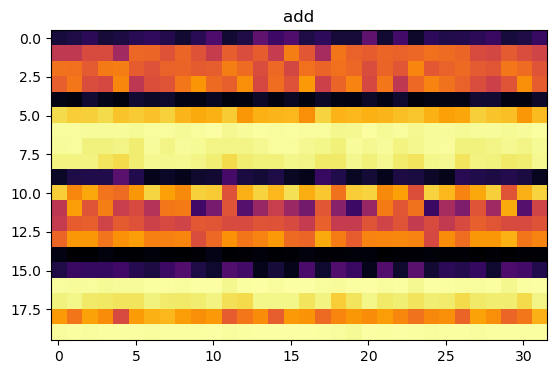

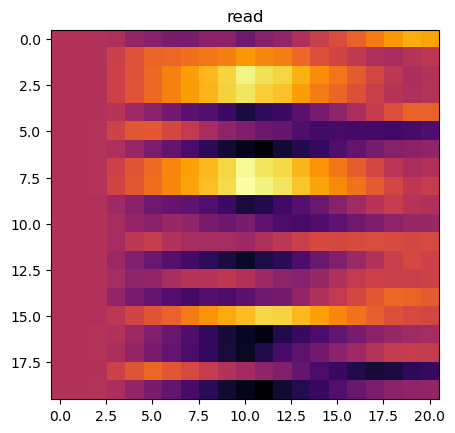

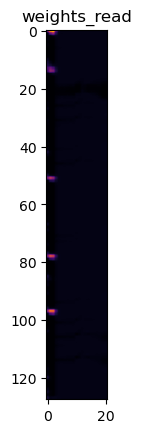

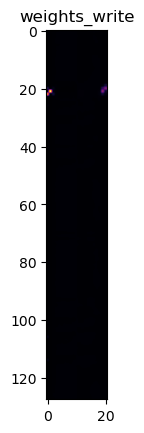

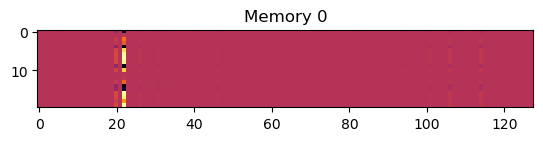

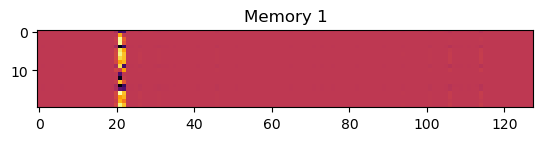

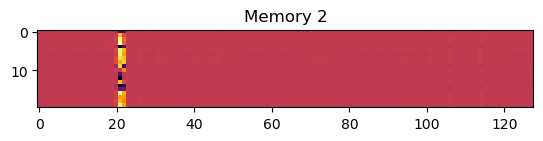

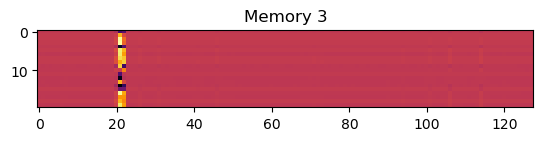

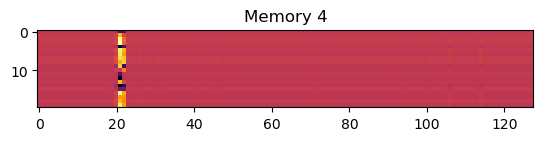

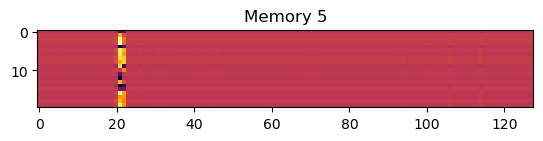

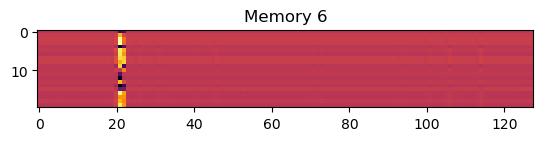

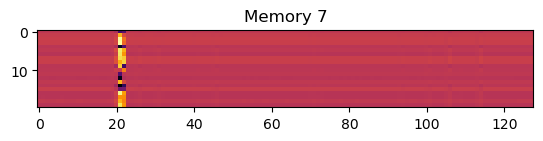

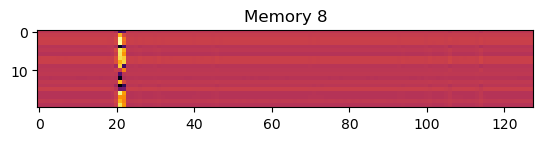

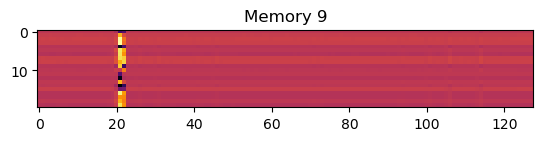

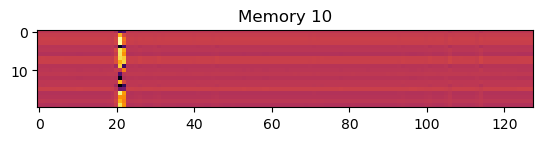

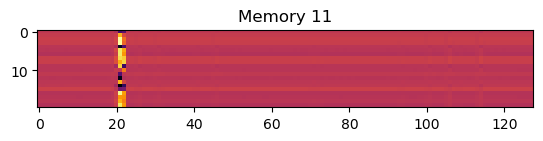

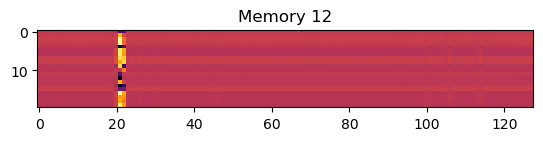

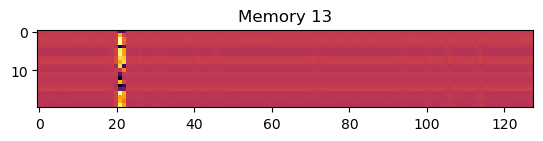

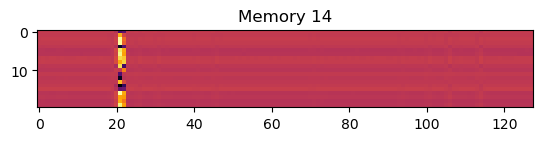

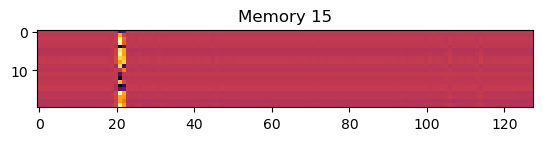

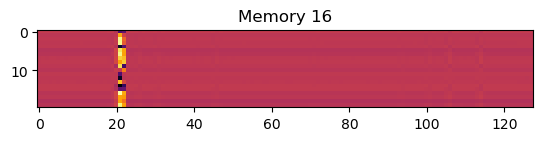

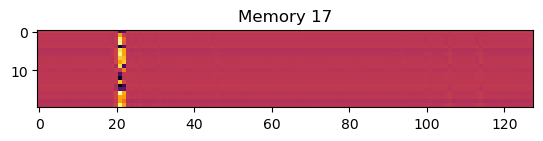

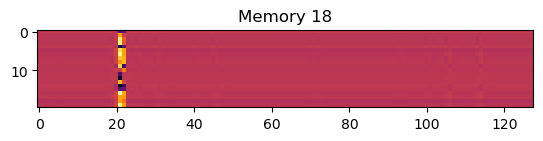

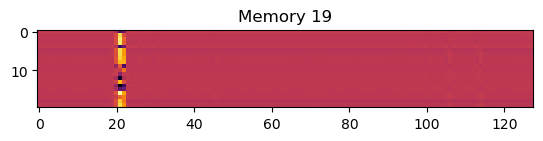

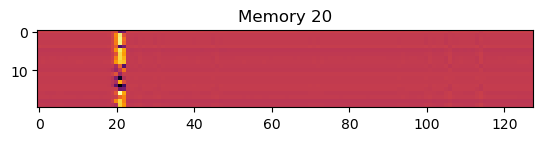

In [3]:
print(model.test(dataset, 10))
model.summary()
model.visualize(dataset)
model.save_weights('parameters/random, scaled, delimiter token, unmasked')

Testing: 100%|██████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.98it/s]

0.031003524
Model: "neural_turing_machine_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 neural_turing_machine_cell_  multiple                 62536     
 1 (NeuralTuringMachineCell)                                     
                                                                 
 rnn_1 (RNN)                 multiple                  62536     
                                                                 
Total params: 62,538
Trainable params: 62,536
Non-trainable params: 2
_________________________________________________________________


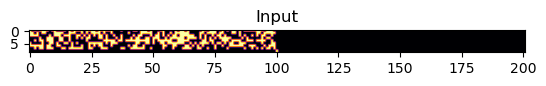

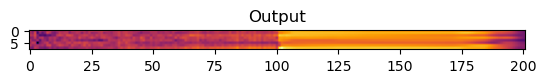

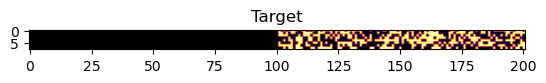

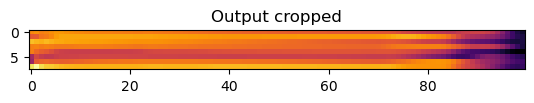

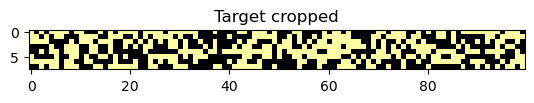

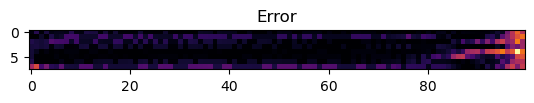

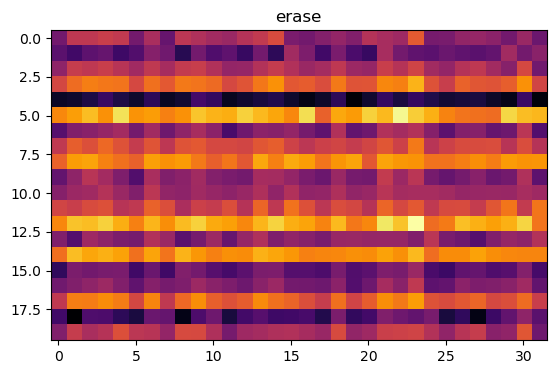

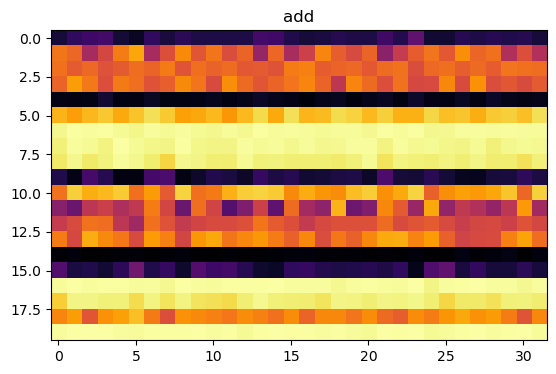

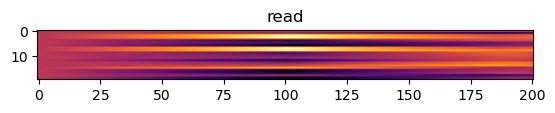

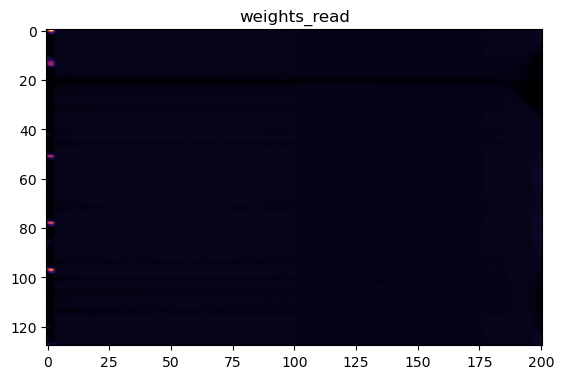

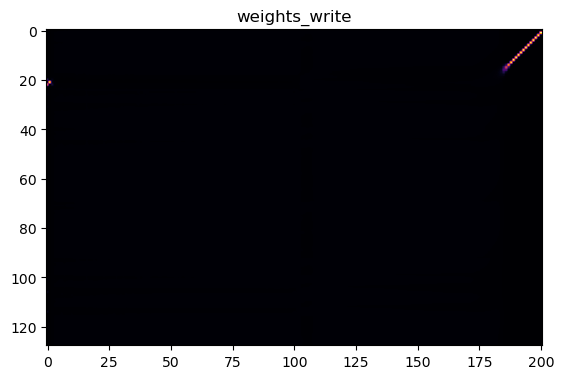

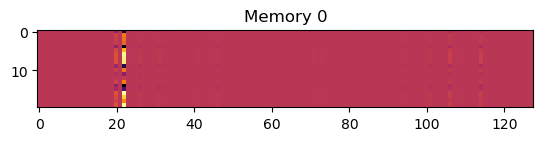

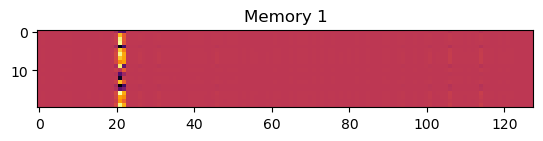

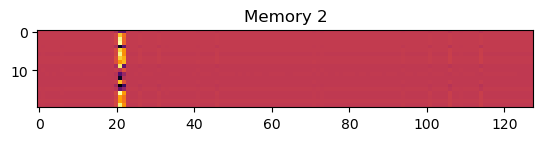

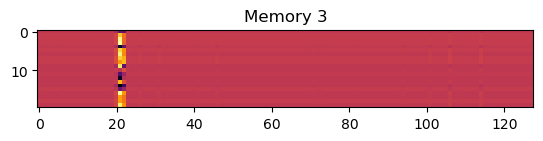

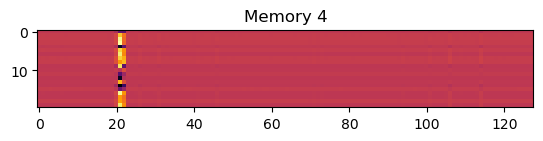

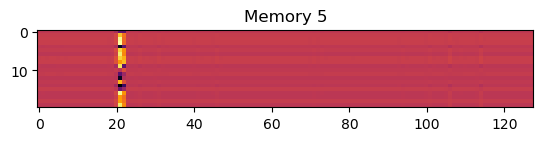

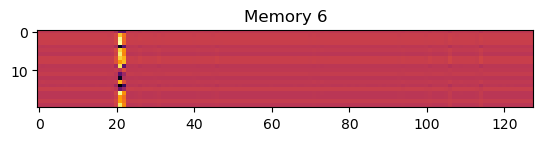

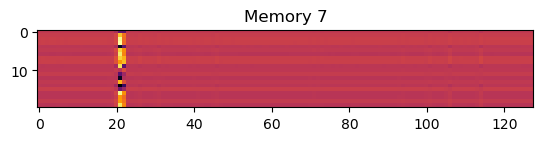

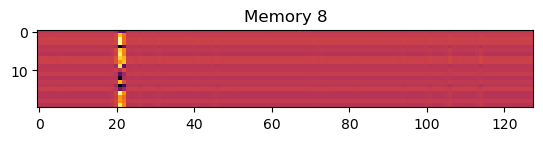

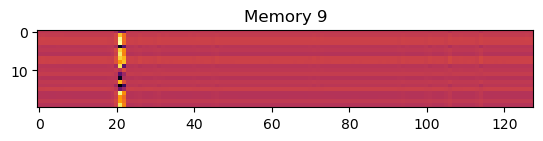

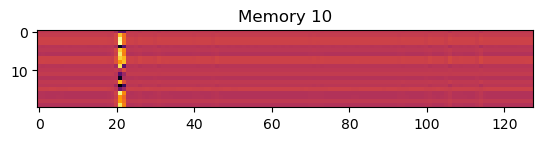

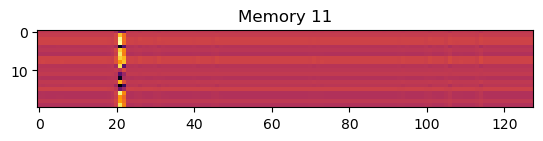

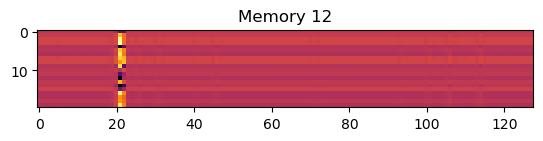

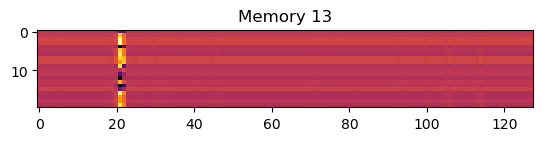

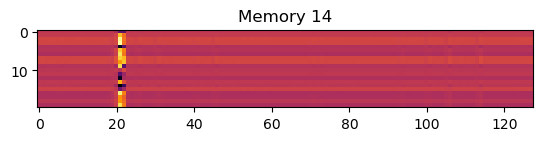

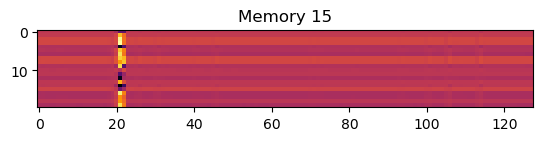

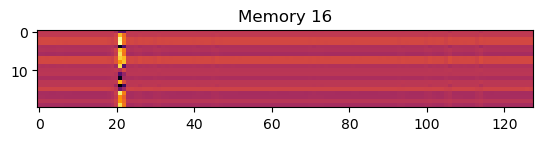

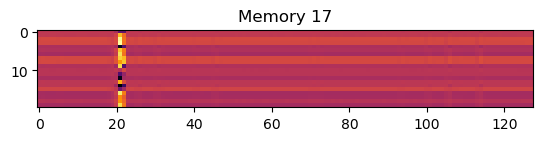

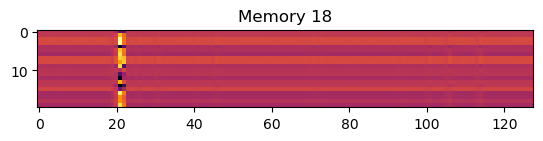

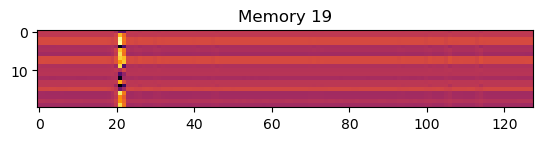

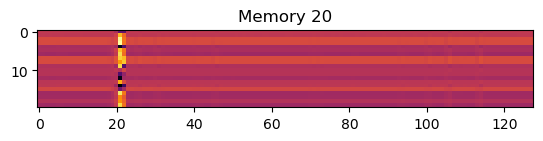

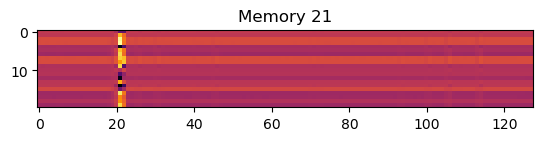

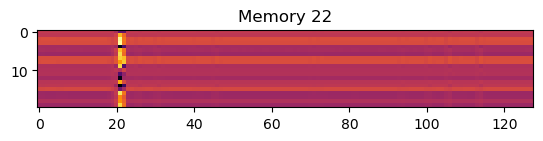

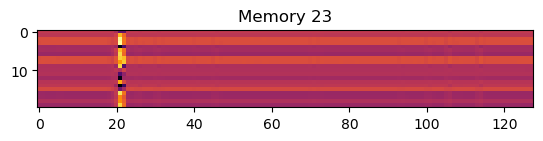

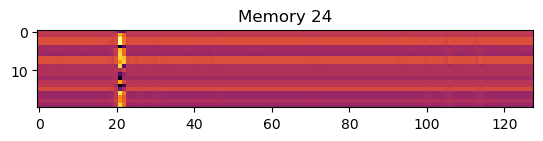

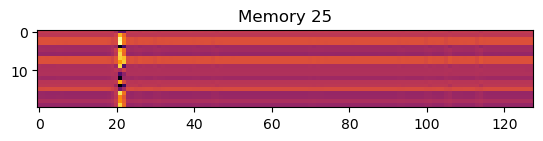

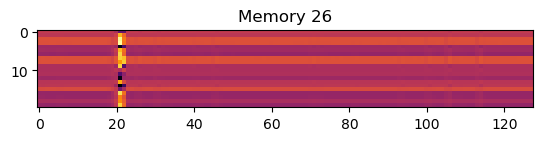

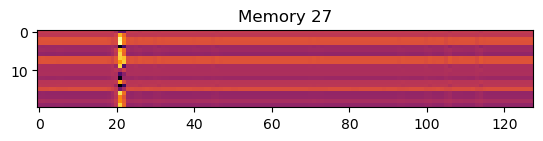

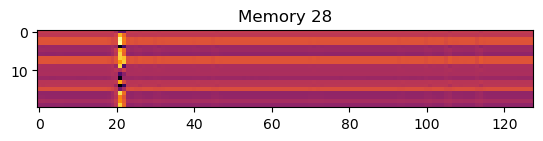

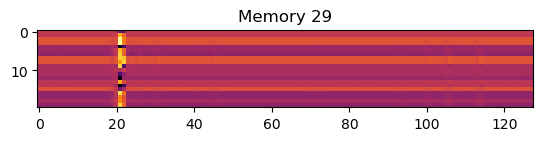

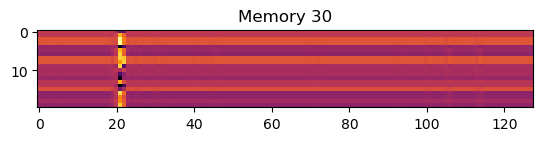

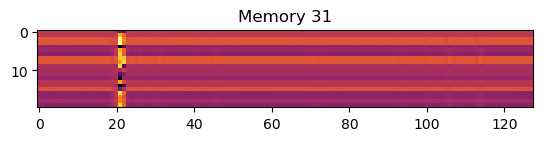

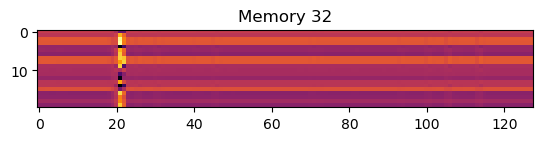

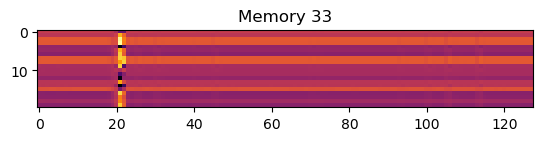

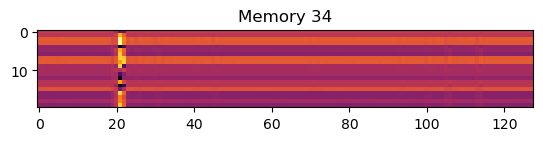

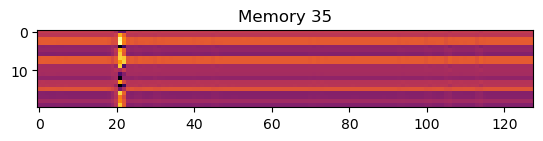

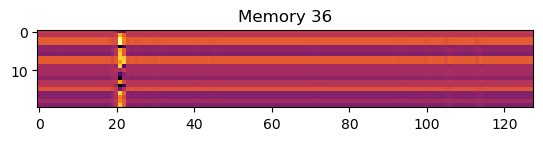

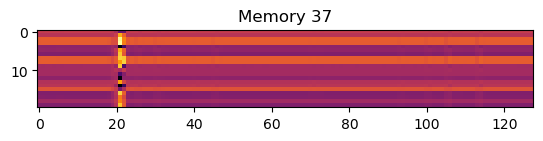

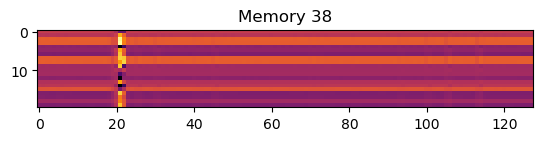

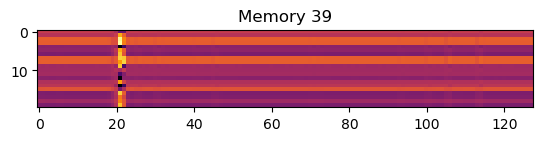

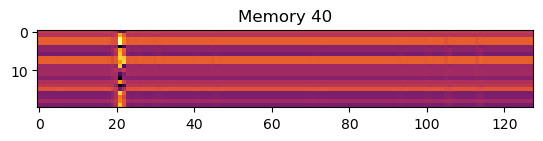

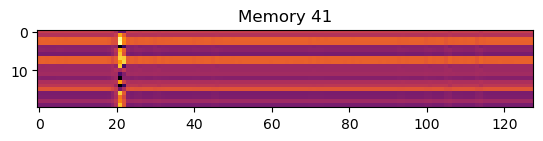

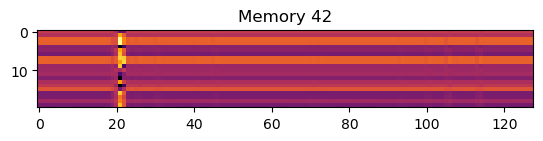

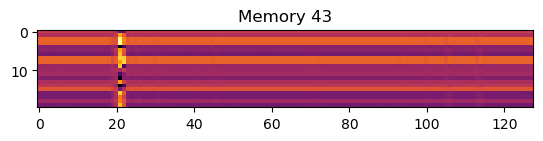

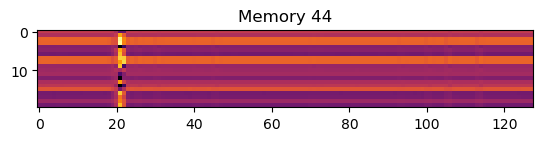

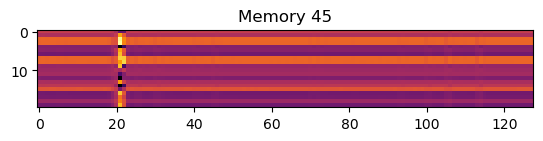

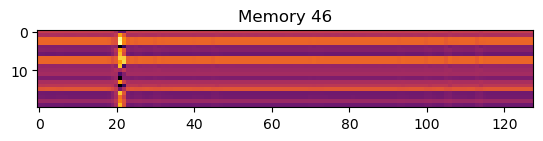

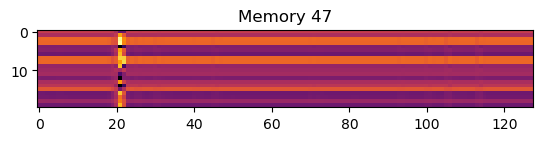

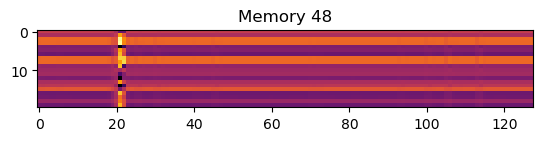

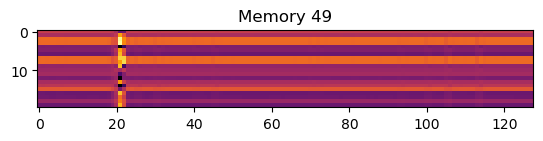

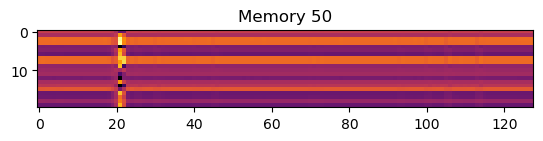

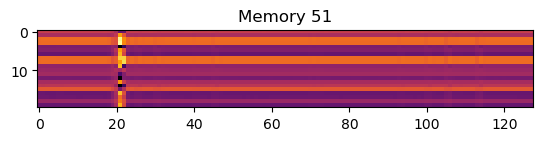

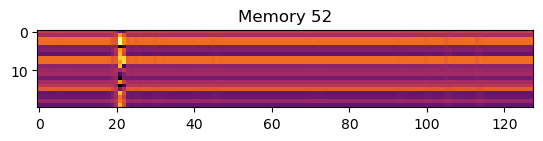

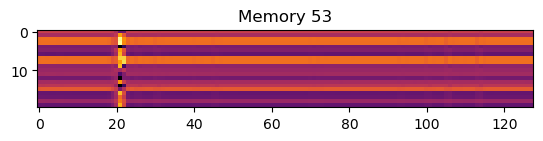

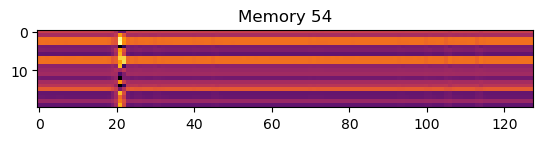

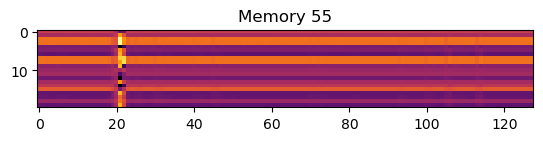

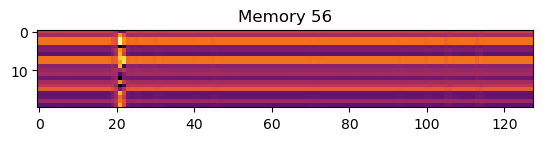

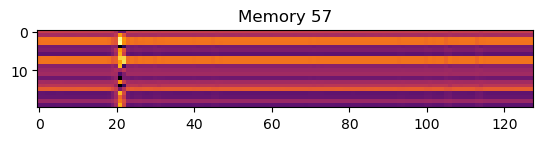

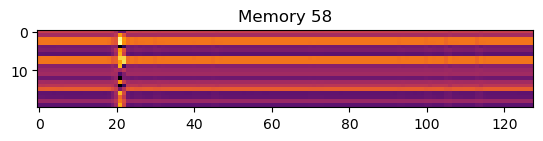

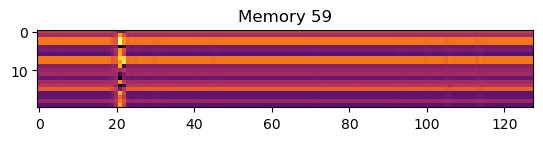

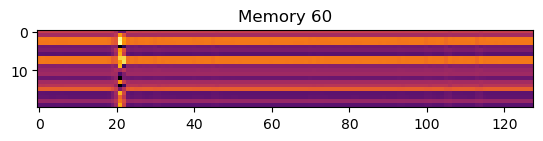

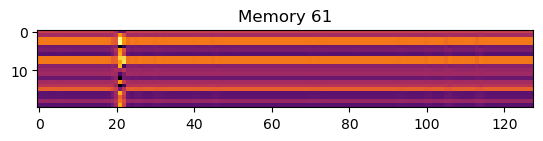

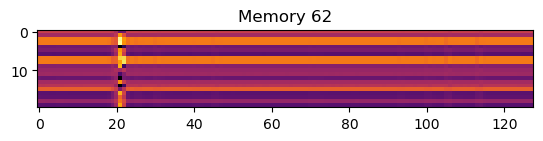

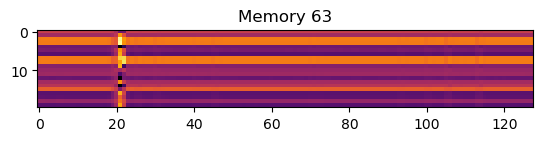

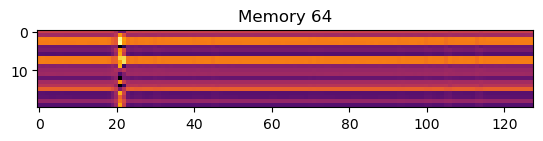

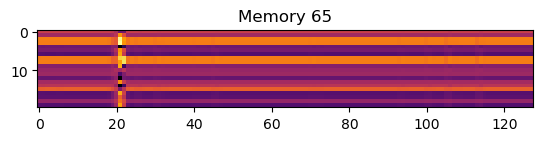

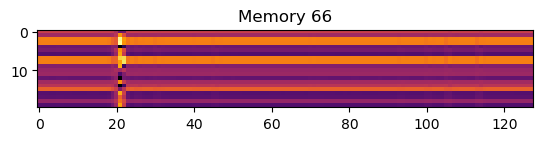

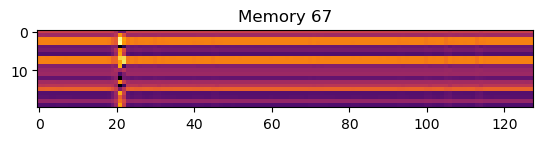

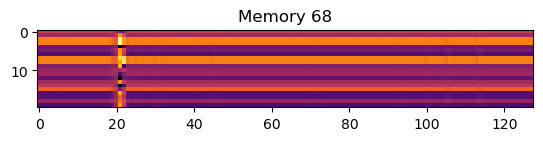

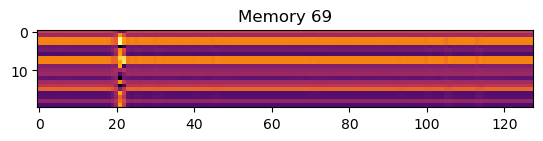

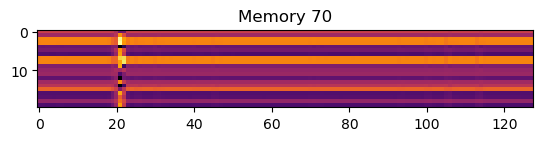

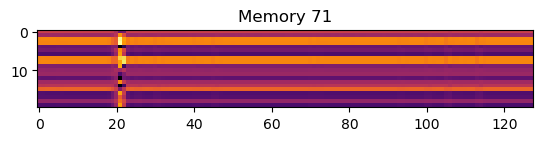

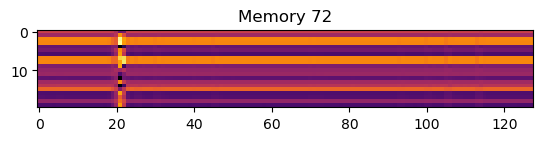

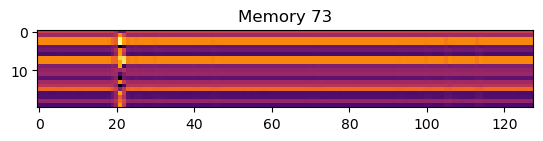

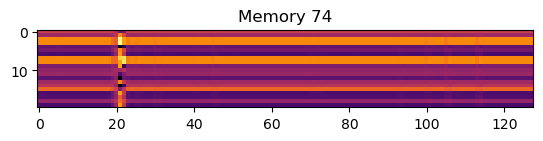

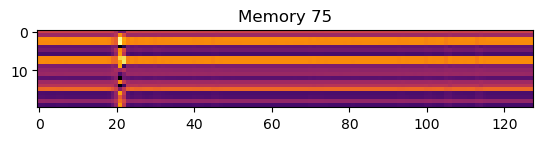

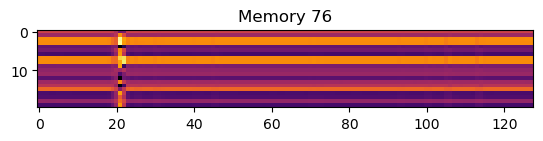

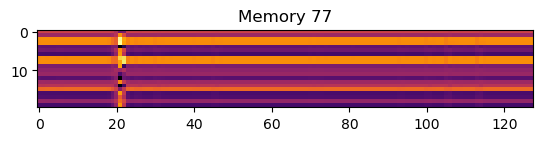

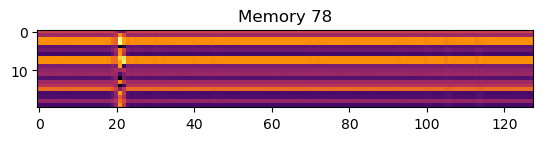

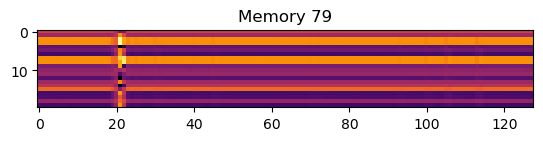

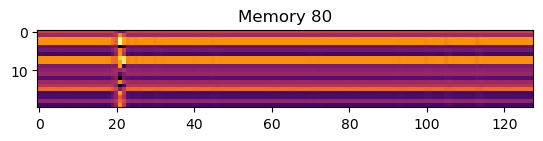

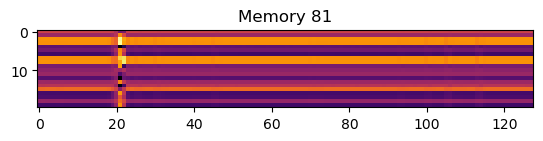

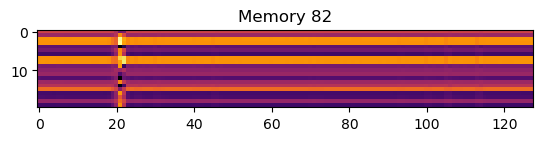

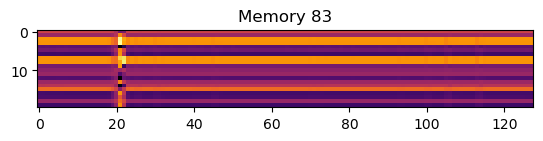

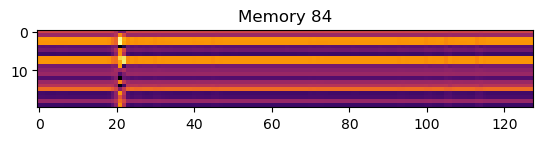

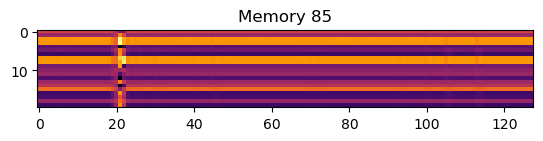

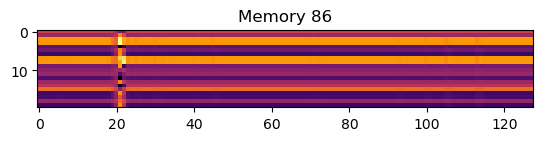

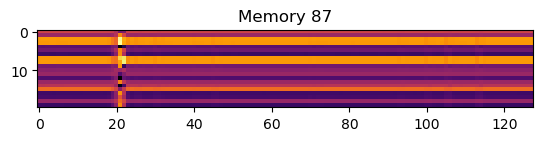

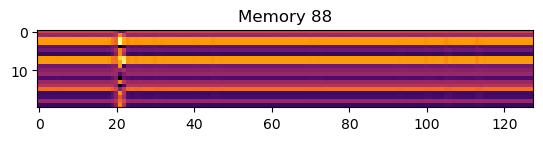

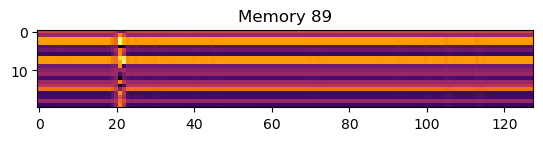

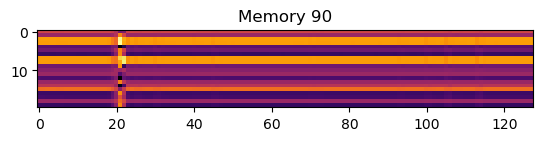

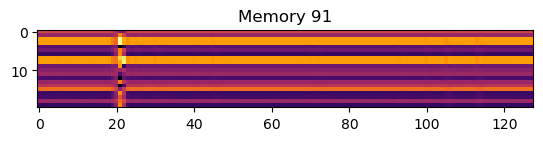

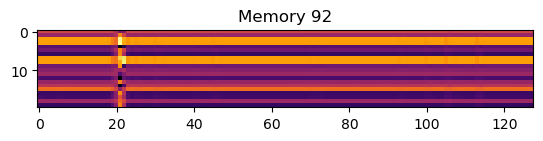

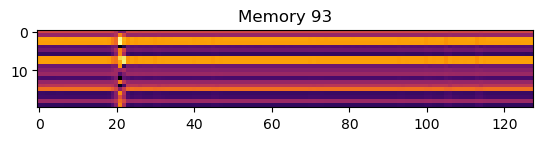

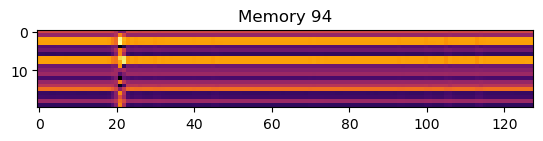

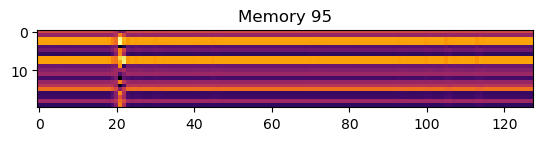

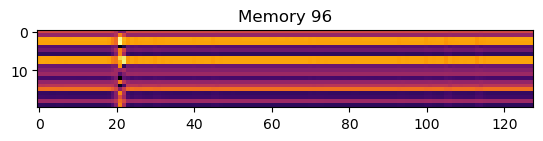

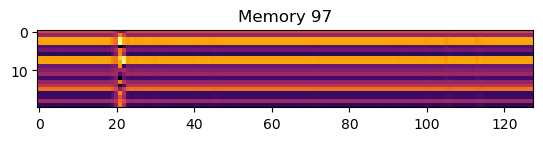

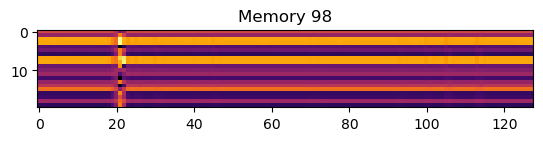

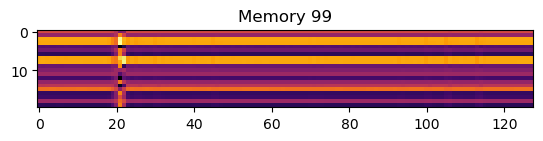

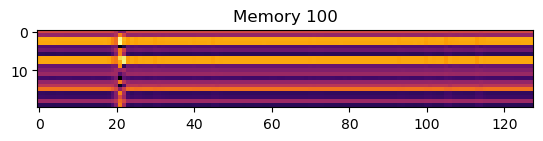

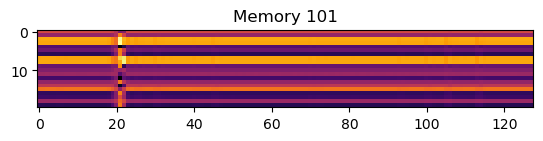

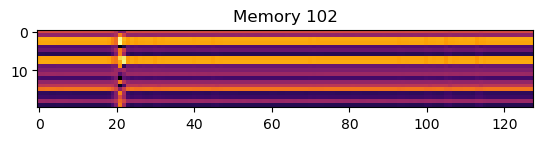

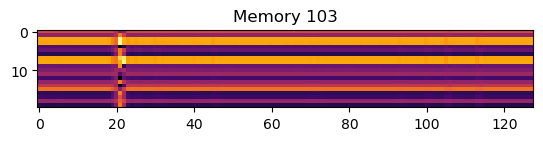

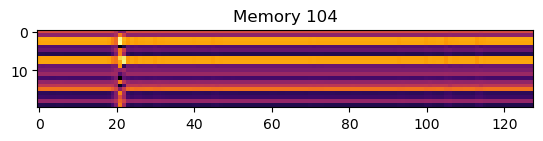

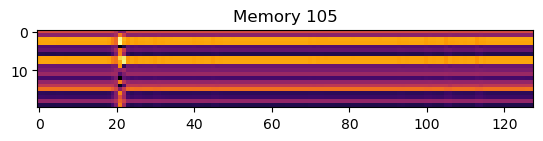

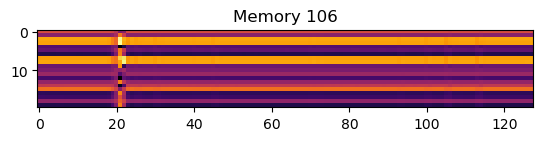

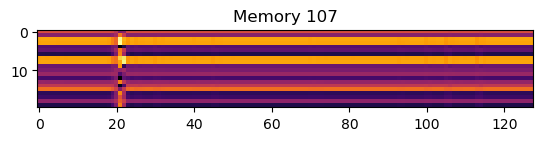

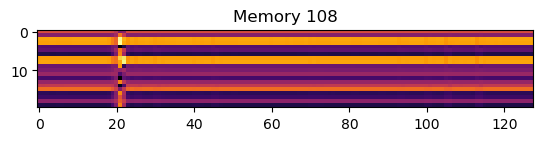

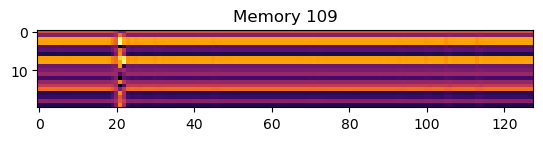

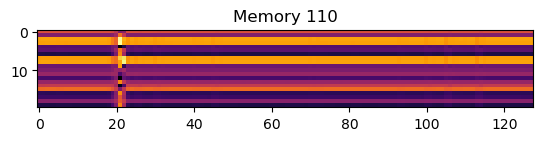

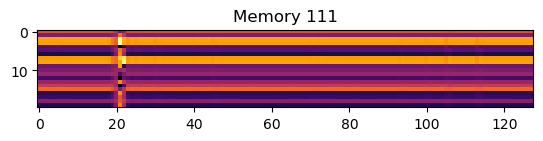

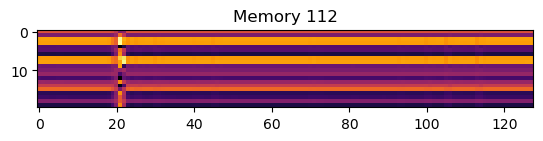

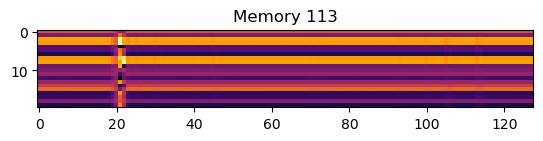

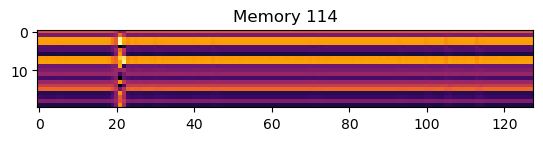

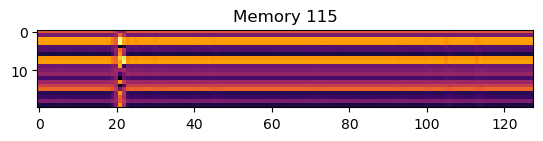

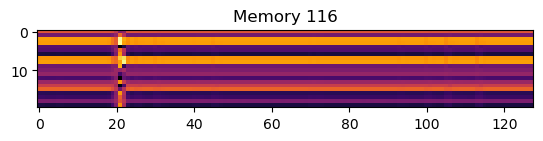

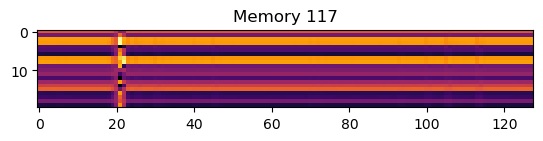

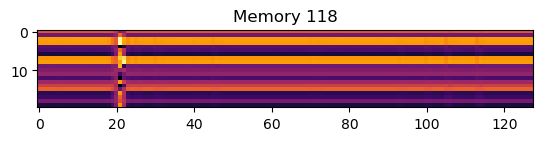

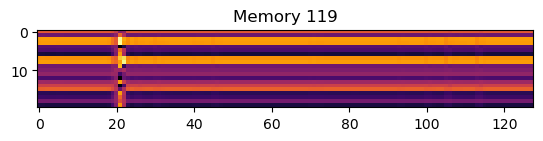

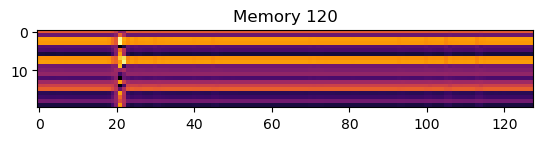

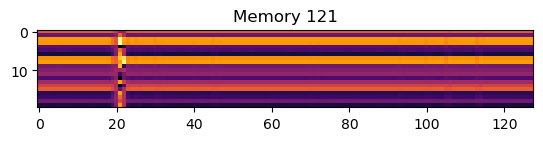

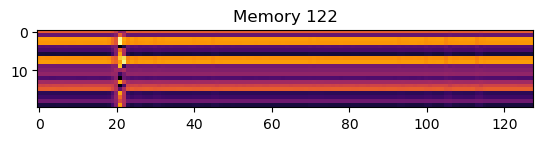

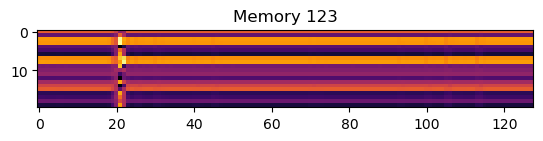

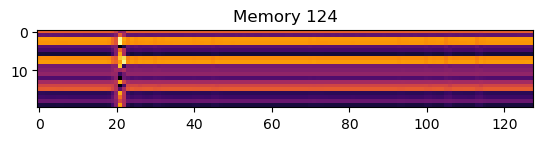

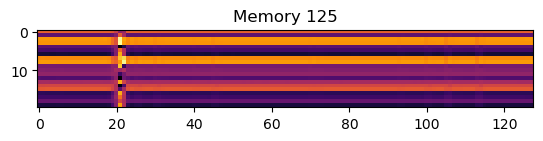

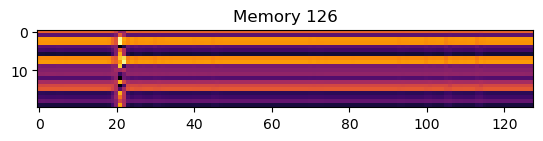

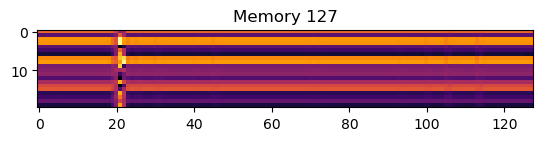

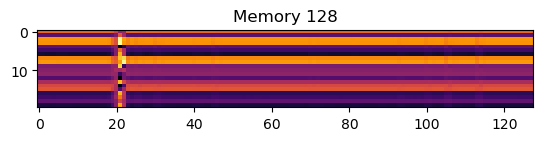

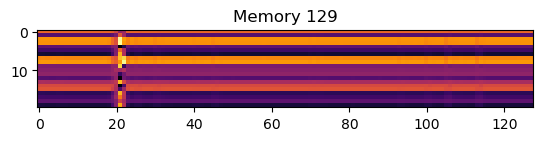

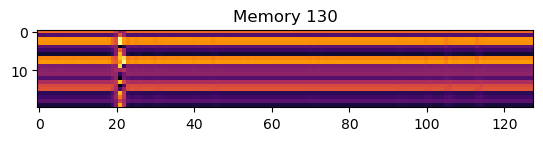

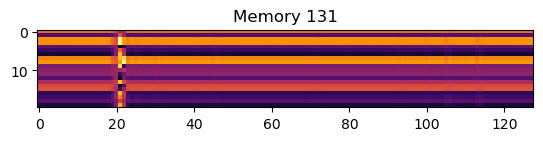

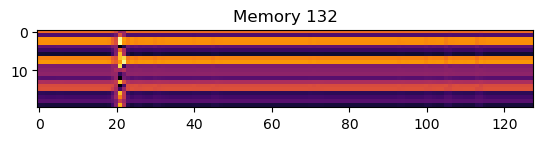

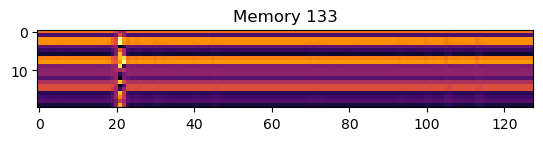

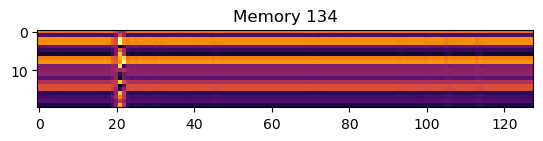

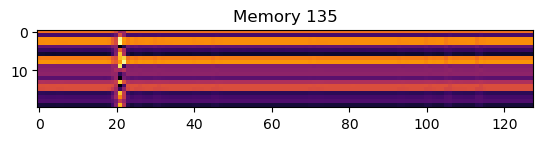

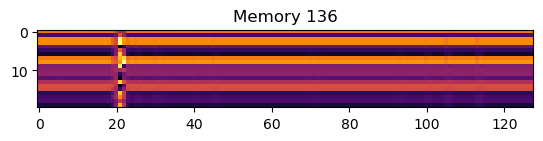

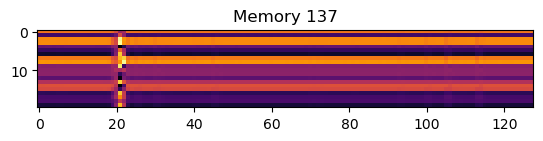

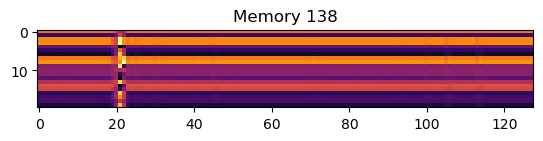

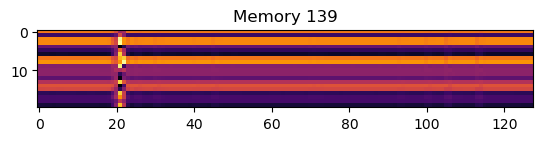

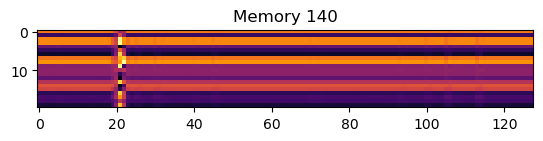

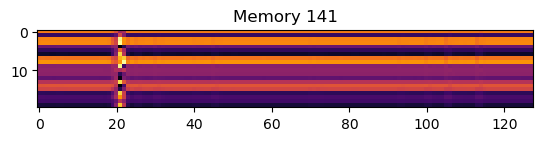

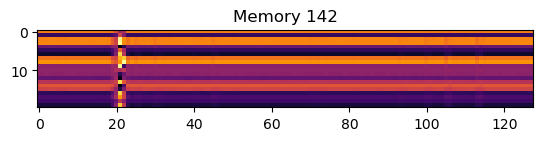

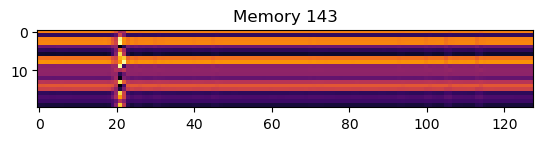

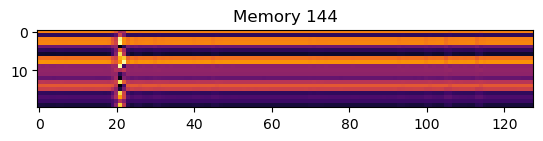

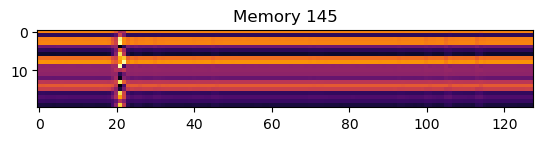

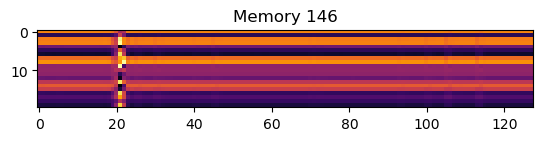

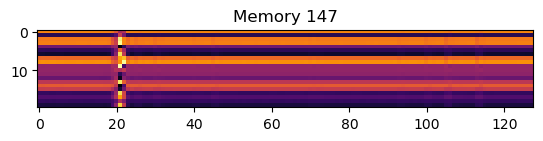

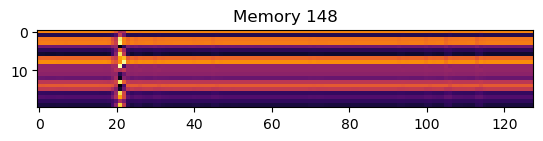

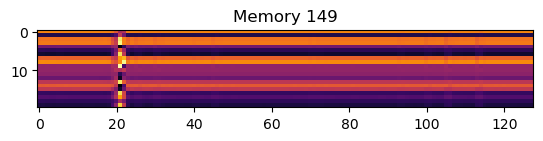

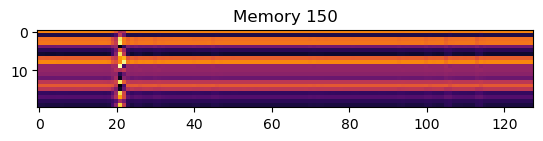

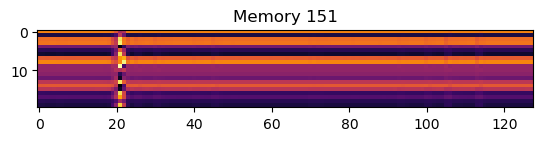

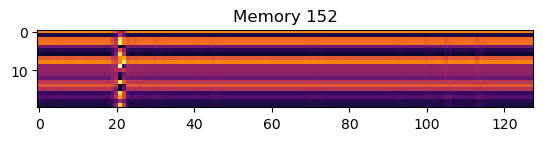

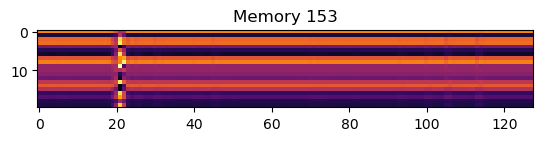

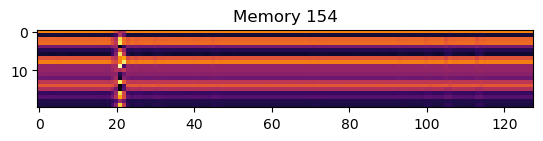

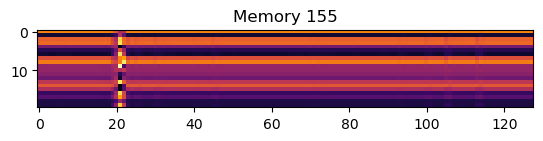

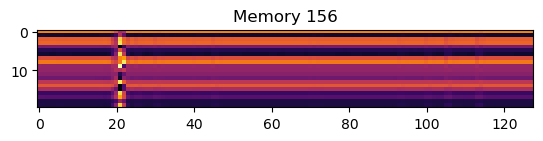

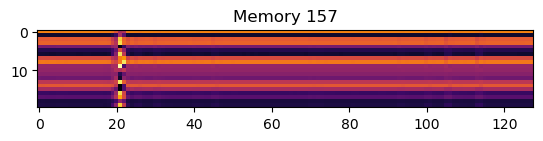

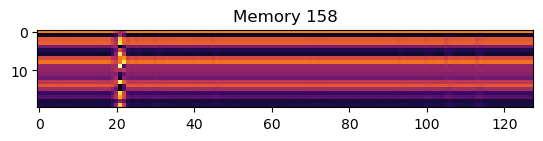

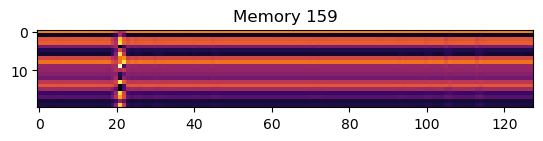

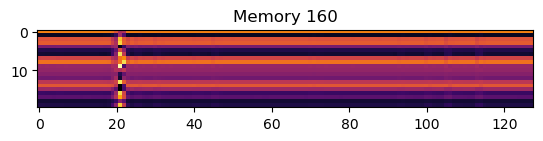

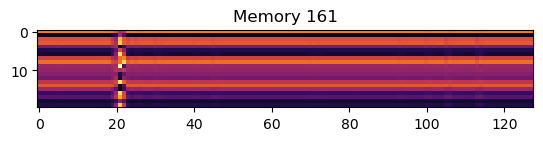

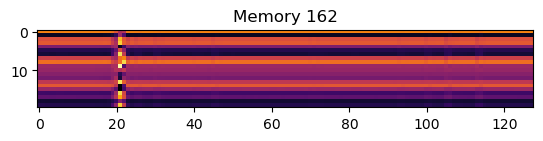

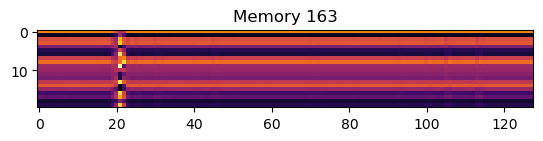

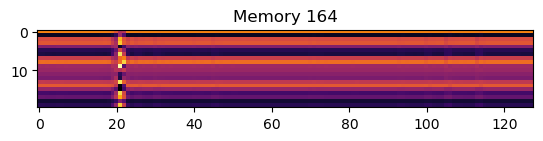

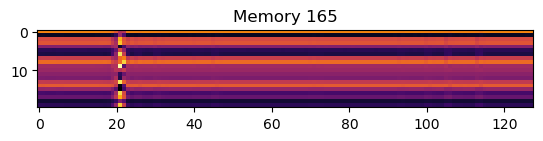

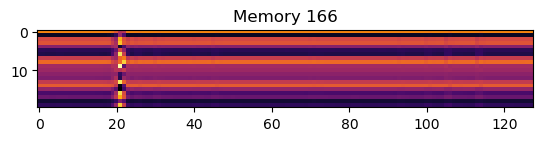

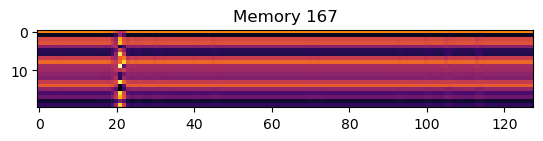

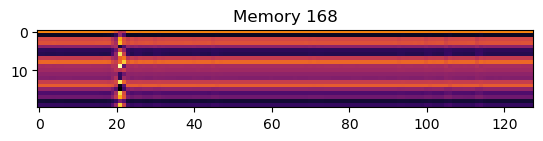

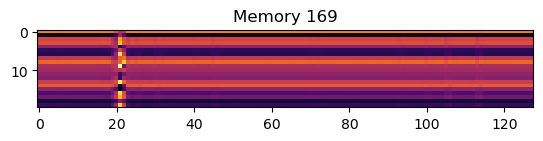

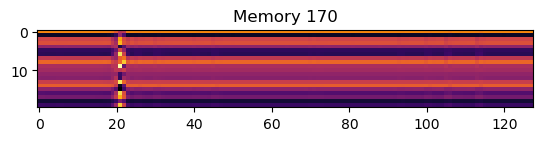

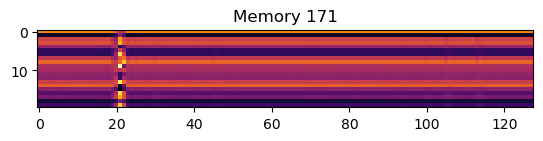

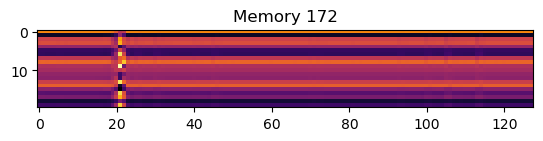

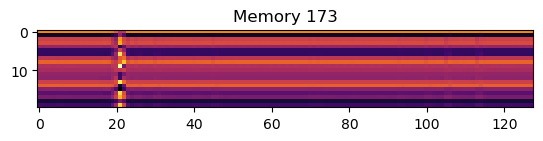

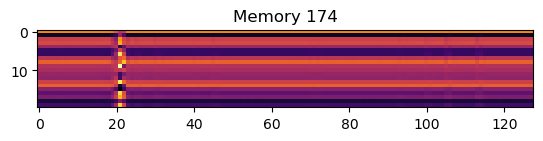

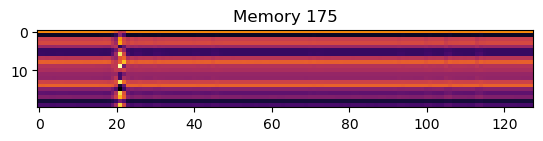

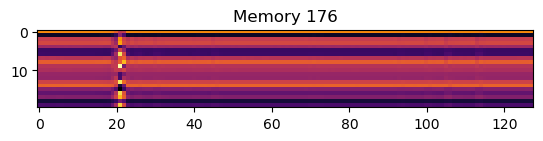

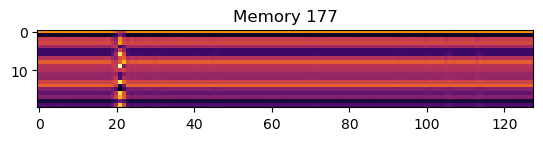

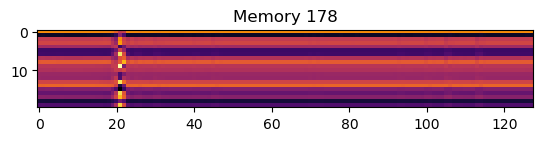

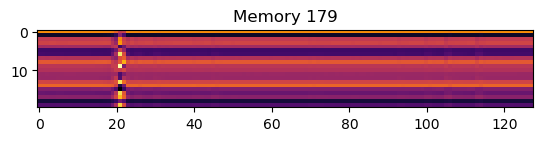

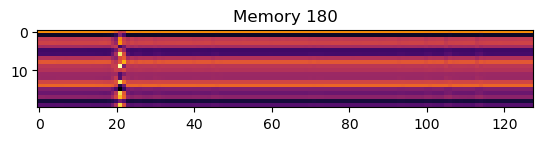

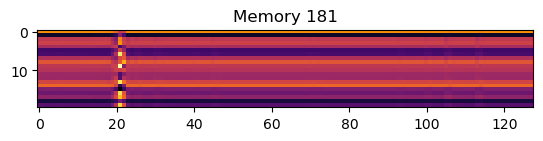

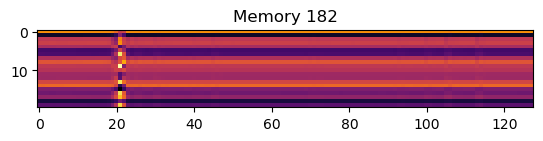

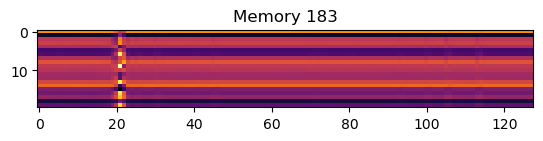

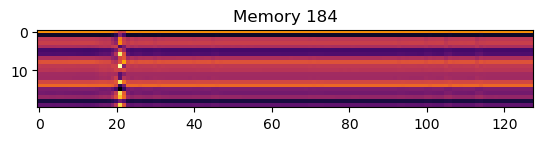

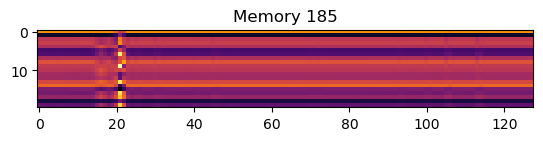

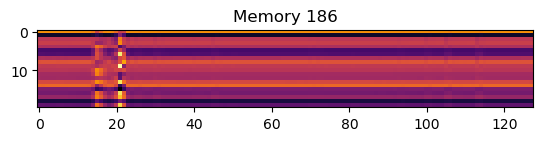

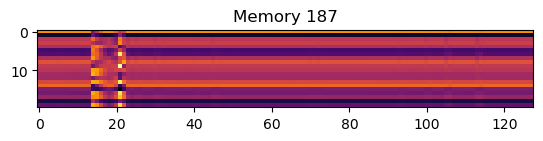

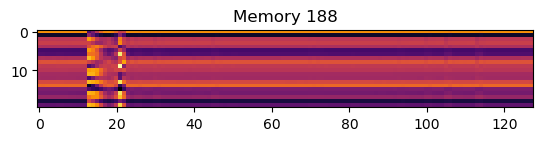

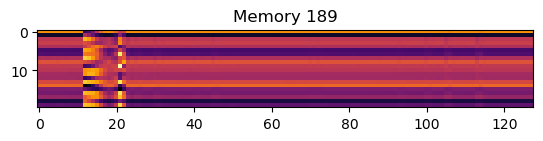

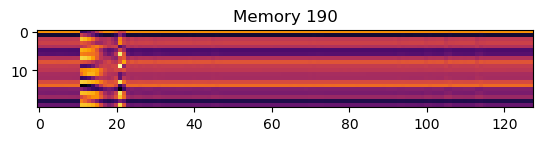

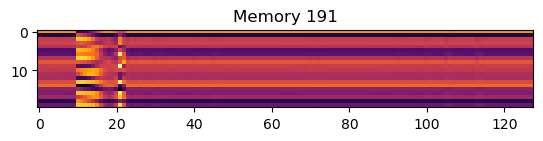

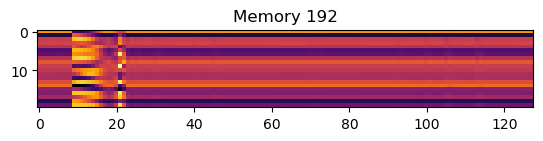

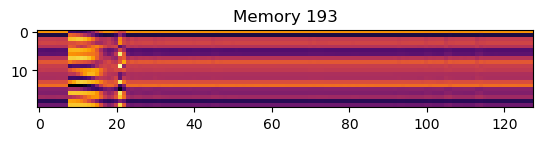

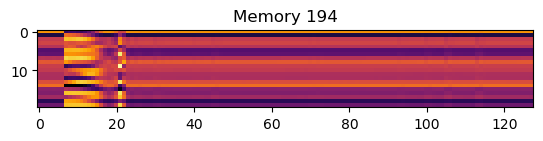

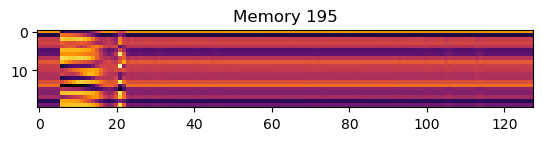

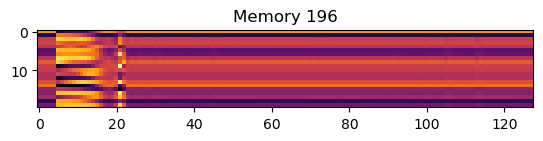

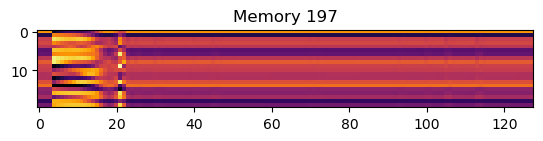

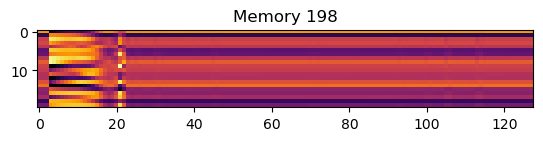

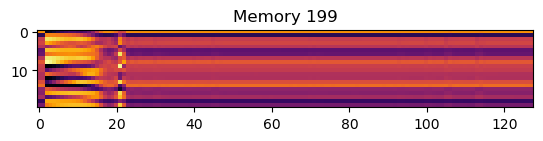

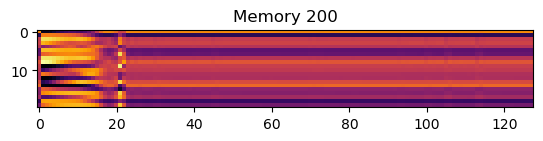

In [4]:
from datasets import *
from model import *
from matplotlib import pyplot as plt
%matplotlib inline

dataset = copy_token_dataset_100

model = NeuralTuringMachine()
X, Y, mask = next(iter(dataset))
model(X)

print(model.test(dataset, 10))
model.load_weights('parameters/random, scaled, delimiter token, unmasked')
model.summary()
model.visualize(dataset)